In [1]:
import pandas as pd
import numpy as np
from dbfread import DBF

In [7]:
# path = r'D:/TREESLab/TREES/Eco_folios/water_stress/gba_trans/lulc2_transitions.dbf' # 文件目录
# table = DBF(path)
# df = pd.DataFrame(iter(table))
# df.to_csv("D:/TREESLab/TREES/Eco_folios/water_stress/gba_trans/lulc2_transitions.csv",index_label="FID")

In [15]:
df = pd.read_csv('D:/TREESLab/TREES/Eco_folios/water_stress/gba_trans/lulc2_transitions.csv')
# 对于每个类型的gridcode1，计算不同gridcode的计数
grouped = df.groupby(['gridcode_1', 'gridcode']).size().unstack(fill_value=0)

# 如果某些压力值不存在，则它们不会出现在结果中。我们可以重新索引以确保所有可能的压力值都出现。
all_pressure_values = range(11)  # 包含的所有值
grouped = grouped.reindex(columns=all_pressure_values, fill_value=0)

# 打印结果或保存到新的CSV文件
print(grouped)
grouped.to_csv('D:/TREESLab/TREES/Eco_folios/water_stress/gba_trans/transitions_statis.csv')

gridcode       0     1      2     3      4       5      6     7      8     9   \
gridcode_1                                                                      
0               3    81      7     3     29      31      9     1     34     1   
100            12    34     13     8    106      82     57     4     46     2   
106           486  2327   1839   678  12843   23663   8141  1621   4391   204   
107            24    16      4    59     62      53    109     6     65     8   
108           158   259    292    98   1195    2148    862   189    432    41   
202         14907  8411  13567  4775  48726  103389  43337  6216  16119  3262   
300             1     1      0     0      6       2      1     0      3     0   
306            49   108     66    34    312     345    136    10    193    23   
406            21    21     16     6     35     102     21     0     31     9   
500         16150  6629  20169  4860  27442   41987  17317  5264  17005  3422   
501           170   161    8

In [2]:
df1 = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='change_score')
df2 = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='extent_score')
df3 = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='occurence_score')
df4 = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='recurrence_score')
df5 = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='seasonal_score')
df6 = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='transitions')

In [3]:
df1

,LULC,AVG,LOSS,GAIN
0,Forest – Subtropical/tropical moist lowland,12.215586,-37.745940,52.848343
1,Forest – Subtropical/tropical swamp,9.244713,-40.735826,48.916925
2,Savanna - Moist,12.808050,-43.309616,54.410031
3,Wetlands (inland),12.651322,-26.913904,40.859717
4,Wetlands (inland) – Permanent rivers/streams/c...,4.752791,-13.369991,18.786314
5,Wetlands (inland) – Seasonal/intermittent/irre...,6.544848,-33.385674,44.716319
6,Wetlands (inland) – Permanent freshwater lakes...,2.510427,-7.613796,12.640962
7,Wetlands (inland) – Permanent freshwater marsh...,5.898156,-27.604819,27.637741
8,Wetlands (inland) – Seasonal/intermittent sali...,32.697278,-35.446407,51.750832
9,Marine Neritic,-15.418095,-41.847606,41.846320


In [3]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import font_manager

# 设置全局字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'  # 全局设置字体加粗
plt.rcParams['axes.labelweight'] = 'bold'  # 轴标签加粗
plt.rcParams['figure.titleweight'] = 'bold'  # 图表标题加粗

In [11]:
# 对DataFrame按照'net_change'这一列降序排序
df_sorted = df1.sort_values(by='AVG', ascending=True)
df_sorted

,LULC,AVG,LOSS,GAIN
10,Seagrass (Submerged),-29.686694,-42.054048,34.047390
9,Marine Neritic,-15.418095,-41.847606,41.846320
12,Tidepools,-10.250759,-35.383679,34.429479
11,Marine Intertidal,-6.171271,-22.801755,29.451539
6,Wetlands (inland) – Permanent freshwater lakes...,2.510427,-7.613796,12.640962
4,Wetlands (inland) – Permanent rivers/streams/c...,4.752791,-13.369991,18.786314
7,Wetlands (inland) – Permanent freshwater marsh...,5.898156,-27.604819,27.637741
17,Urban Areas,6.014136,-57.166713,63.903451
5,Wetlands (inland) – Seasonal/intermittent/irre...,6.544848,-33.385674,44.716319
1,Forest – Subtropical/tropical swamp,9.244713,-40.735826,48.916925


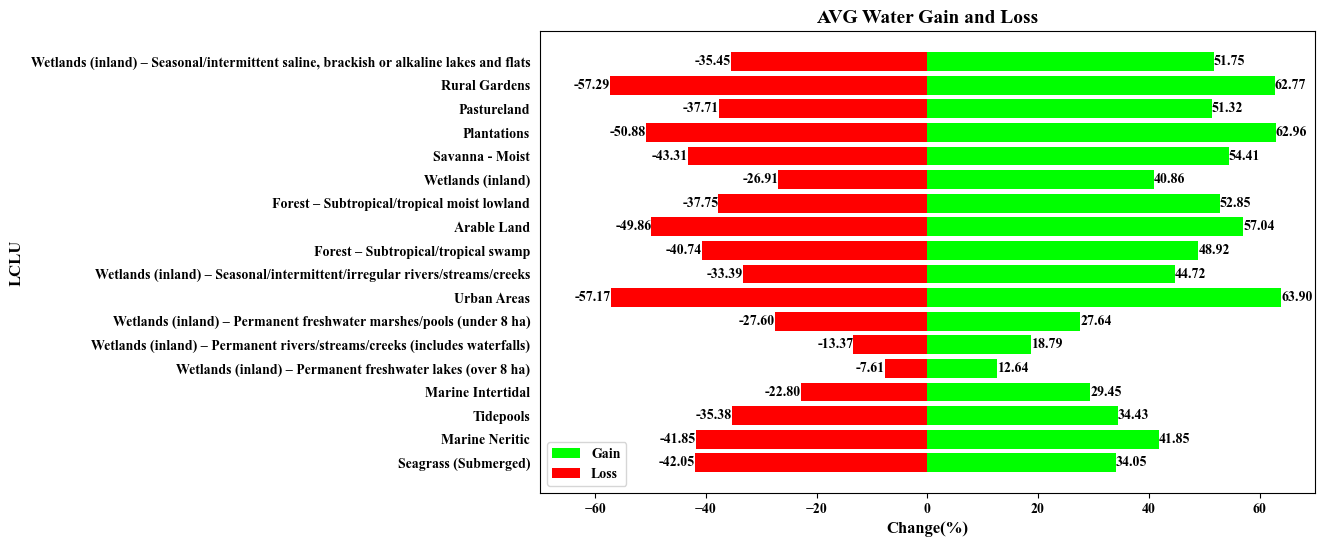

In [25]:
# 创建一个图形和一个坐标轴
fig, ax = plt.subplots(figsize=(10,6))

# 绘制正向条形图
g = ax.barh(df_sorted['LULC'], df_sorted['GAIN'], color='#00FF00', label='Gain')

# 绘制负向条形图
l = ax.barh(df_sorted['LULC'], df_sorted['LOSS'], color='#FF0000', label='Loss')

# 添加标题和标签
ax.set_title('AVG Water Gain and Loss', fontsize=14, fontdict={'weight': 'bold'})
ax.set_xlabel('Change(%)', fontsize=12)
ax.set_ylabel('LCLU', fontsize=12)

ax.yaxis.set_ticks_position('none')  # 关闭y轴的刻度线
ax.tick_params(axis='y', which='both', left=False, right=False)  # 关闭y轴的所有刻度标记

# 设置x轴的范围
ax.set_xlim([-70, 70])

# 添加图例
ax.legend()

# 在条形图的右端显示水获取数值
for bar in g:
    xval = bar.get_width()  # 获取条形的宽度
    yval = bar.get_y() + bar.get_height() / 2  # 计算条形的中心点y坐标
    ax.text(xval, yval, f'{xval:.2f}', ha='left', va='center', color='black')  # 添加文本

# 在条形图的左端显示水损失数值
for bar in l:
    xval = bar.get_width()  # 获取条形的宽度
    yval = bar.get_y() + bar.get_height() / 2  # 计算条形的中心点y坐标
    ax.text(xval, yval, f'{xval:.2f}', ha='right', va='center', color='black')  # 添加文本
    
# 显示图表
plt.show()

In [5]:
# 假设这是你的标签数组和值数组
labels = np.array(df1['LULC'])
values = np.array(df1['LOSS'])
# value2 = np.array(100 * df6['permanent'])

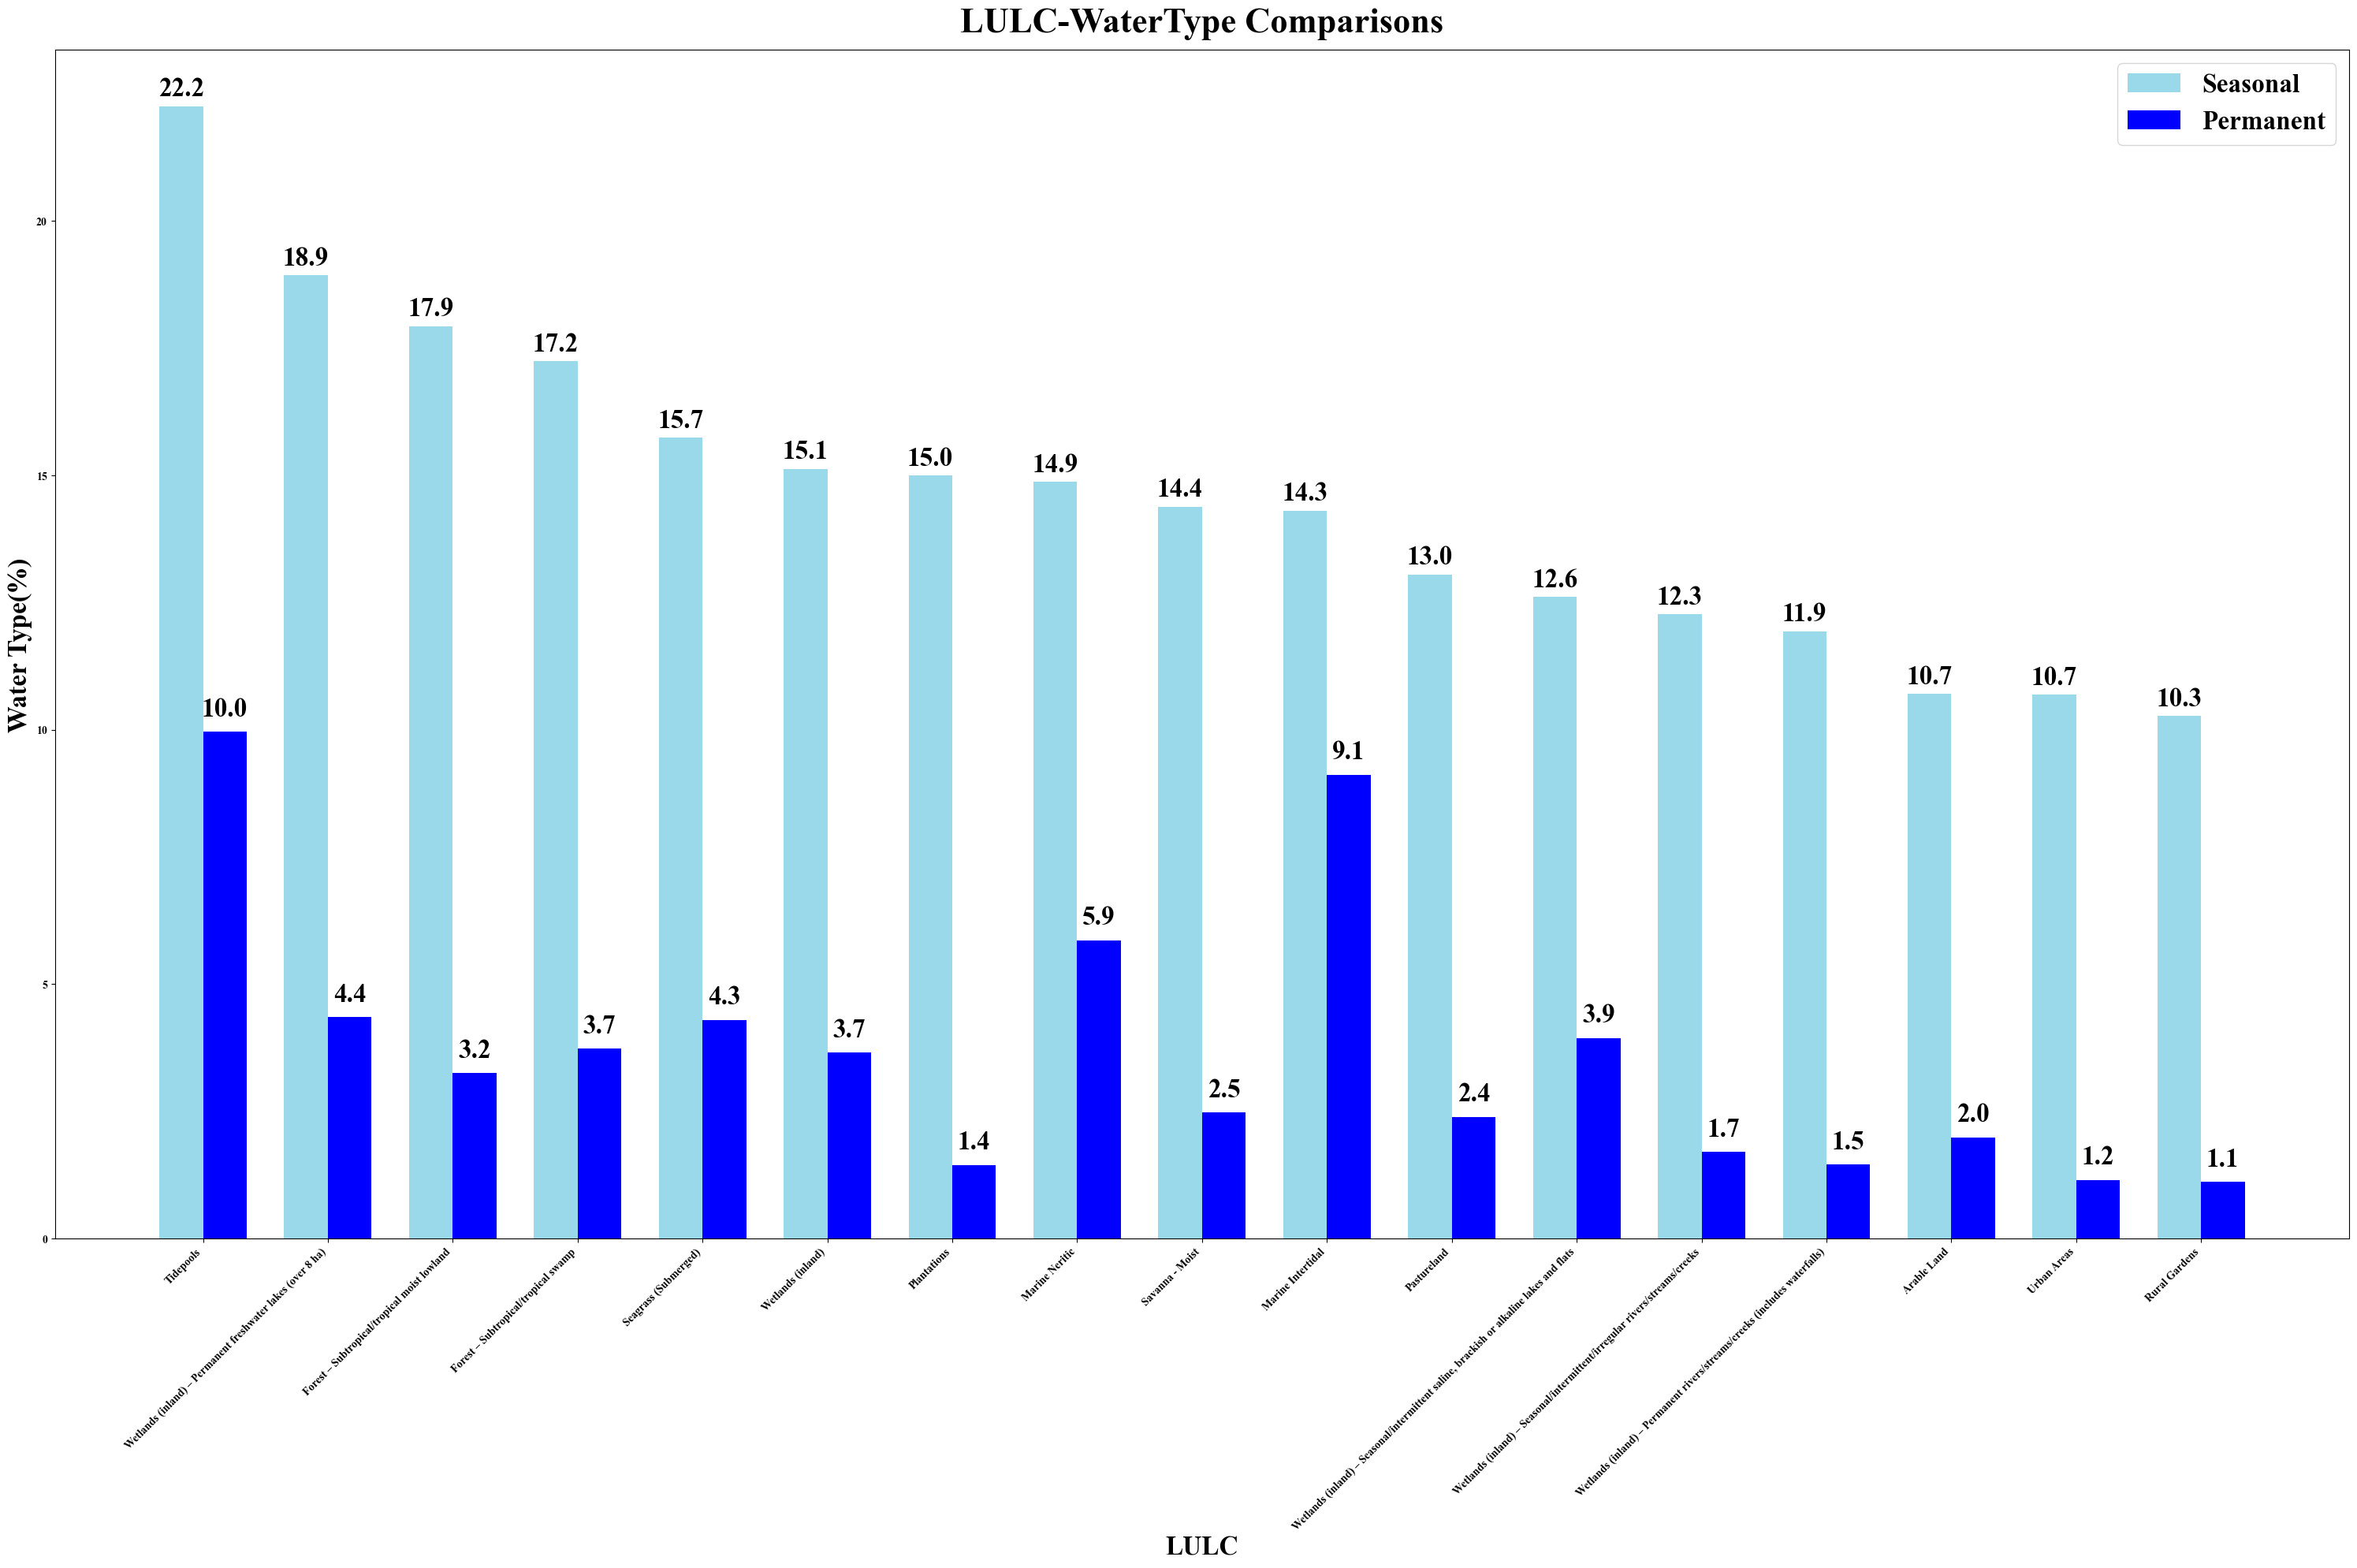

In [81]:
# 对值数组进行降序排序，并保留其索引
sorted_indices = sorted(range(len(values)), key=lambda i: values[i], reverse=True)

# 根据排序后的索引重新排列标签和值
sorted_labels = [labels[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]
# sorted_value2 = [value2[i] for i in sorted_indices]

# 创建柱状图
fig, ax = plt.subplots(figsize=(20, 15))

# 设置柱状图的宽度和间距
bar_width = 0.35
index = np.arange(len(sorted_labels))

# 定义颜色映射，从绿色到红色
cmap = LinearSegmentedColormap.from_list("Green_to_Red", ["#99D9EA", "#0000AA"])

# 计算颜色映射的规范器，使数值最大最小映射到颜色映射的范围
# norm = Normalize(vmin=1, vmax=12)

# 绘制柱状图，注意使用color参数指定颜色映射
# bars = ax.bar(sorted_labels, sorted_values, color=cmap(norm(sorted_values)))
# bars = ax.bar(sorted_labels, sorted_values, color='#FFC90E')

# 绘制第一、二组柱子，并设置x轴偏移，避免重叠
plt.bar(index, sorted_values, bar_width, label='Seasonal', color='#99D9EA')
plt.bar(index+bar_width, sorted_value2, bar_width, label='Permanent', color='#0000FF')


# 在每个柱子顶部添加数值标签
# for bar in bars:
    # yval = bar.get_height()
    # if yval < 0:
        # ax.text(bar.get_x() + bar.get_width()/2.0, yval-0.5, f'{yval:.2f}', va='top', ha='center', color='black', fontsize=20) 
    # else:
        # ax.text(bar.get_x() + bar.get_width()/2.0, yval+0.7, f'{yval:.1f}', va='top', ha='center', color='black', fontsize=20) 
for i in range(len(sorted_labels)):
    plt.text(index[i], sorted_values[i] + 0.1, f'{sorted_values[i]:.1f}', ha='center', va='bottom', color='black',fontsize=24)  # 白色文字，确保在深色柱子上可见
    plt.text(index[i]+bar_width, sorted_value2[i] + 0.2, f'{sorted_value2[i]:.1f}', ha='center', va='bottom', color='black',fontsize=24) 
    
# 添加颜色条
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# bar = fig.colorbar(sm, ax=ax, orientation='vertical')
# bar.ax.set_ylabel('ColorMap', fontsize=24)

# 调整横轴标签的倾斜度
plt.xticks(index + bar_width / 2, sorted_labels)
plt.xticks(rotation=45, ha='right')

# 添加标题和坐标轴标签
plt.title('LULC-WaterType Comparisons', fontsize=32, y=1.01, fontweight='bold')
plt.xlabel('LULC', fontsize=24)
plt.ylabel('Water Type(%)', fontsize=24)
plt.legend(fontsize=24)
# 紧凑布局，防止标签被裁剪
plt.tight_layout()

# 显示图表
plt.show()

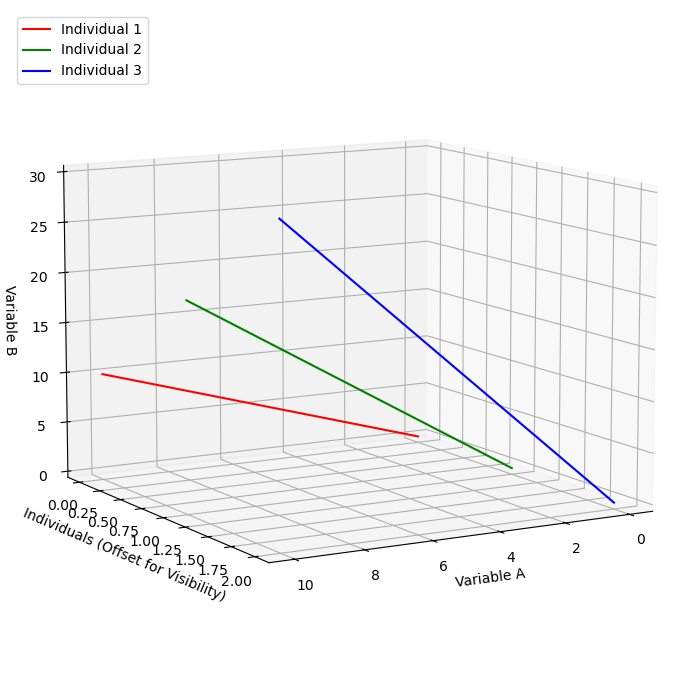

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 数据准备
individual_count = 3
A_values = np.linspace(0, 10, 100)  # 自变量A从0到10，100个点
# 这里构造B_values，让每个个体的B值随A有不同的变化，突出Z轴上的形态
B_values = [A_values * (i + 1) for i in range(individual_count)]  

# 创建3D图表
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个个体的3D折线
colors = ['red', 'green', 'blue']
labels = [f'Individual {i+1}' for i in range(individual_count)]
for i, b_line in enumerate(B_values):
    # 在3D图中，X轴是A_values，Y轴是固定的个体标识（用i表示，但为了可视化效果，我们将它稍微偏移以便区分线条）
    ax.plot(A_values, np.zeros_like(A_values) + i, b_line, 
            label=labels[i], color=colors[i])

# 设置坐标轴标签
ax.set_xlabel('Variable A')
ax.set_ylabel('Individuals (Offset for Visibility)')
ax.set_zlabel('Variable B')

# 添加网格线以增强深度感知
ax.grid(True)

# 调整视角，使得Z轴上的变化更加明显
ax.view_init(elev=10, azim=60)  # 调整仰角(elev)和方位角(azim)以获得最佳视角

# 添加图例
ax.legend(loc='upper left')  # 图例位置调整，避免遮挡图形

# 紧凑布局，去除多余空白
plt.tight_layout()

# 显示图形
plt.show()

In [198]:
from mpl_toolkits.mplot3d import Axes3D

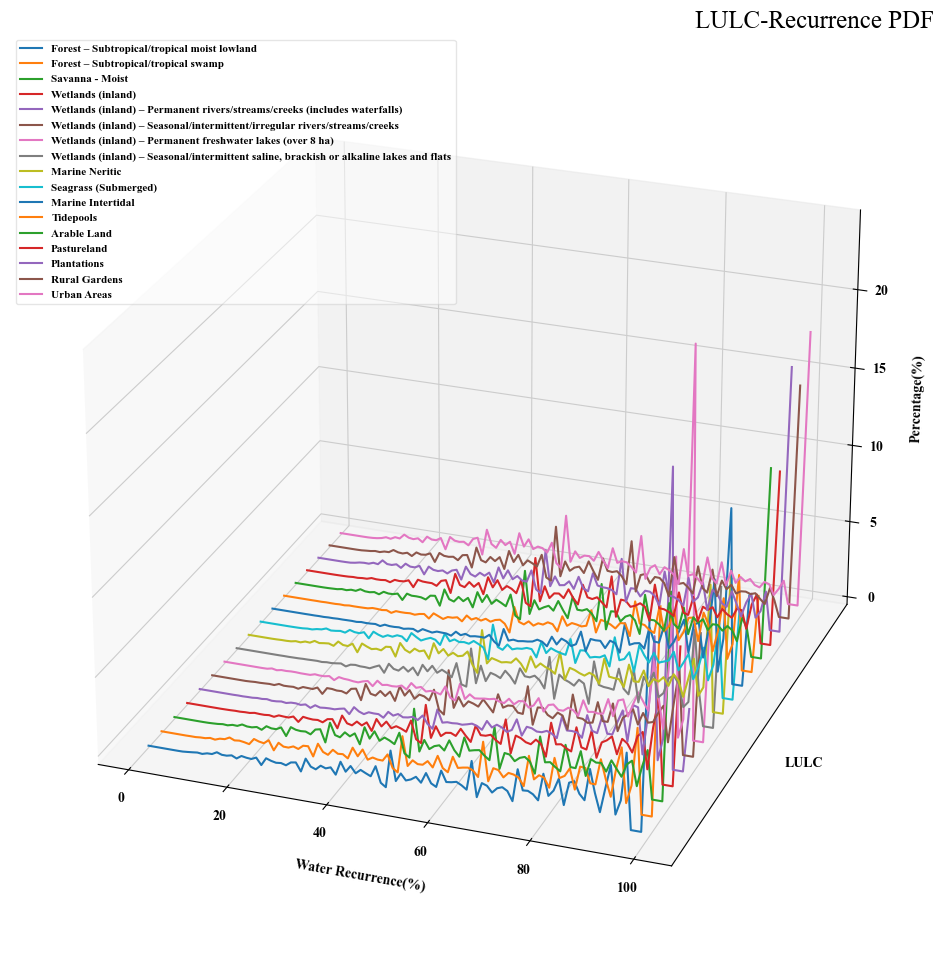

In [207]:
df = pd.read_excel('LULC_WS_distribution.xlsx', sheet_name='recurrence_pdf')
df.iloc[:, 1:] *= 100

# 将土地类型转换为数值型以便绘图
labels = df['LULC'].tolist()
df['LULC'] = range(1, len(df) + 1)

# 设置图形大小
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

# 绘制每种土地类型的折线
for index, row in df.iterrows():
    x = np.arange(1, 101)  # 压力值
    y = np.full_like(x, row['LULC'])  # 土地类型编号
    z = np.array([row[val] for val in x])  # 数据点比例
    ax.plot(x, y, z, label=labels[index])

# 设置坐标轴标签
ax.set_xlabel('Water Recurrence(%)', labelpad=10)
ax.set_ylabel('LULC')
ax.set_zlabel('Percentage(%)', labelpad=10)

# 在 x=0 处绘制 zoy 平面，并设置透明度
#xx, yy = np.meshgrid(np.linspace(0, 20, 20), np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 10))
#zz = np.zeros_like(xx)  # z值都为0
#ax.plot_surface(zz, yy, xx, alpha=0.2, color='gray')  # 设置透明度为0.2

# 调整视角
ax.view_init(elev=25, azim=-70)  # 改变视角以获得更好的视觉效果

# 显示图例
ax.legend(loc='upper left', fontsize=8, framealpha=0.5)

ax.xaxis._axinfo['grid']['color'] = (0.8, 0.8, 0.8, 1)  # 将x轴网格线颜色设置为透明
ax.yaxis._axinfo['grid']['color'] = (1, 1, 1, 0)  # 将y轴网格线颜色设置为透明
ax.zaxis._axinfo['grid']['color'] = (0.8, 0.8, 0.8, 1)  # 保持z轴网格线颜色为黑色

ax.set_yticks([])

plt.title('LULC-Recurrence PDF', fontsize=18, loc='right', pad=-20)
# 显示图形
plt.show()